In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# extraction

In [144]:
df_raw = pd.read_csv("../data/1-raw/slo_annuel_2024.csv")

C:\Users\gallien\AppData\Local\Temp\ipykernel_3380\3431264659.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("../data/1-raw/slo_annuel_2024.csv")


# copie

In [145]:
df = df_raw.copy()
df.shape

(1873489, 27)

# compréhension des données

In [146]:
pd.options.display.max_columns = None
df.head()

,date_circ,id_circ,num_marche,code_ci_origine,code_ch_origine,lib_ci_origine,code_ci_destination,code_ch_destination,lib_ci_destination,ui,lib_ui,tct,lib_tct,rang,code_ci_jalon,code_ch_jalon,lib_ci_jalon,code_ligne,pk,distance_cumul,type_horaire,dh_the_jalon,dh_obs_jalon,dh_est_jalon,id_engin,composition,mode_traction
0,2024-01-01,82524375,9730,751008,BV,Marseille-St-Charles,784009,ES,Perpignan,9156,RENFE VIAJEROS,LVJ,"TAGV International France-Espagne, à charge",0,751008,BV,Marseille-St-Charles,830000.0,862+050,0,D,2024-01-01 08:04:00,2024-01-01 08:04:48,2024-01-01 08:04:48,TGVR,E32C,E
1,2024-01-01,82519044,4071,547000,BV,Paris-Austerlitz,481002,BV,Nantes,9159,OSLO,NB1,"GL Inter-Villes - Train classique, VL>= 160 km/h",0,547000,BV,Paris-Austerlitz,570000.0,0+000,0,D,2024-01-01 07:12:00,2024-01-01 07:16:38,2024-01-01 07:16:38,22200,V160,E
2,2024-01-01,82519044,4071,547000,BV,Paris-Austerlitz,481002,BV,Nantes,9159,OSLO,NB1,"GL Inter-Villes - Train classique, VL>= 160 km/h",61,545244,BV,Juvisy,570000.0,19+038,19028,A,2024-01-01 07:25:00,2024-01-01 07:30:15,2024-01-01 07:30:15,22200,V160,E
3,2024-01-01,82519044,4071,547000,BV,Paris-Austerlitz,481002,BV,Nantes,9159,OSLO,NB1,"GL Inter-Villes - Train classique, VL>= 160 km/h",62,545244,BV,Juvisy,570000.0,19+038,19028,D,2024-01-01 07:27:30,2024-01-01 07:33:01,2024-01-01 07:33:01,22200,V160,E
4,2024-01-01,82519044,4071,547000,BV,Paris-Austerlitz,481002,BV,Nantes,9159,OSLO,NB1,"GL Inter-Villes - Train classique, VL>= 160 km/h",132,543017,BV,Les Aubrais-Orléans,570000.0,118+881,118946,A,2024-01-01 08:19:00,2024-01-01 08:22:11,2024-01-01 08:22:11,22200,V160,E


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873489 entries, 0 to 1873488
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date_circ            object 
 1   id_circ              int64  
 2   num_marche           object 
 3   code_ci_origine      int64  
 4   code_ch_origine      object 
 5   lib_ci_origine       object 
 6   code_ci_destination  int64  
 7   code_ch_destination  object 
 8   lib_ci_destination   object 
 9   ui                   int64  
 10  lib_ui               object 
 11  tct                  object 
 12  lib_tct              object 
 13  rang                 int64  
 14  code_ci_jalon        int64  
 15  code_ch_jalon        object 
 16  lib_ci_jalon         object 
 17  code_ligne           float64
 18  pk                   object 
 19  distance_cumul       int64  
 20  type_horaire         object 
 21  dh_the_jalon         object 
 22  dh_obs_jalon         object 
 23  dh_est_jalon         object 
 24

In [148]:
df['id_circ'].unique()

array([82524375, 82519044, 82519046, ..., 87681914, 87696580, 87715530],
      shape=(260067,))

In [149]:
df['num_marche'].unique()

array([9730, 4071, 4080, ..., 9523, 9524, 9519],
      shape=(3748,), dtype=object)

In [150]:
df['lib_ui'].value_counts()

lib_ui
SNCF-VOYAGES           1720054
THI FACTORY              78863
OSLO                     37328
RENFE VIAJEROS           17135
TRENITALIA FRANCE        15174
SNCF-VOYAGEURS            3485
SNCF VOYAGES ITALIA       1450
Name: count, dtype: int64

In [151]:
df['lib_tct'].value_counts()

lib_tct
TAGV - Sud-Est, à charge                                                      464679
TAGV - Atlantique, à charge                                                   356342
TAGV - Nord, à charge                                                         236444
TAGV - Est, à charge                                                          229227
TAGV, axe Bretagne, à charge                                                  113447
TAGV (Train A Grande Vitesse - à charge)                                       91141
TAGV International France Suisse, à charge                                     75920
TAGV haute capacité Nord, à charge                                             62700
TAGV haute capacité Sud-Est, à charge                                          53196
TAGV haute capacité Atlantique, à charge                                       48159
TAGV International France Allemagne, à charge                                  43105
GL Inter-Villes - Train classique, VL>= 160 km/h         

In [152]:
df['mode_traction'].value_counts()

mode_traction
E    1866864
T       2572
B          2
Name: count, dtype: int64

In [153]:
df.isna().sum()

date_circ                  0
id_circ                    0
num_marche                 0
code_ci_origine            0
code_ch_origine            0
lib_ci_origine           171
code_ci_destination        0
code_ch_destination        0
lib_ci_destination       189
ui                         0
lib_ui                     0
tct                        0
lib_tct                    0
rang                       0
code_ci_jalon              0
code_ch_jalon              0
lib_ci_jalon           14388
code_ligne                41
pk                        41
distance_cumul             0
type_horaire               0
dh_the_jalon           44341
dh_obs_jalon           44359
dh_est_jalon              41
id_engin                3989
composition             4030
mode_traction           4051
dtype: int64

In [154]:
# df[df.duplicated()]
# aucun doublon, super

# Nettoyage des données

In [155]:
# conversion des dates
df['date_circ'] = pd.to_datetime(df['date_circ'], errors='coerce', format='%Y-%m-%d')
df['dh_the_jalon'] = pd.to_datetime(df['dh_the_jalon'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['dh_obs_jalon'] = pd.to_datetime(df['dh_obs_jalon'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['dh_est_jalon'] = pd.to_datetime(df['dh_est_jalon'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df.shape

(1873489, 27)

In [165]:
# compte lignes avec dates invalides
df[df['dh_the_jalon'].isna() | df['dh_obs_jalon'].isna() | df['dh_est_jalon'].isna()].shape 
# 4.7% de lignes avec dates invalides : on les supprime
df = df.dropna(subset=['dh_the_jalon', 'dh_obs_jalon', 'dh_est_jalon'])
df.shape

(1784750, 27)

# Calcul du retard à l'arrivée

In [180]:
df_retards = df[df['type_horaire'] == 'A'] # on garde seulement les arrivées, pas les départs de gare
df_retards = df_retards[df_retards['code_ci_jalon'] == df_retards['code_ci_destination']] # on garde juste le terminus
df_retards = df_retards.drop(columns=['ui', 'tct', 'composition', 'type_horaire'])

df_retards['ret_sec'] = (df_retards['dh_est_jalon'] - df_retards['dh_the_jalon']).dt.total_seconds()
df_retards['ret_min'] = df_retards['ret_sec'] / 60

In [187]:
df_retards['ret_min'].describe()

count    247002.000000
mean          6.279154
std          20.444071
min        -112.316667
25%          -0.466667
50%           0.900000
75%           4.600000
max        1437.066667
Name: ret_min, dtype: float64

In [206]:
1437/60

23.95

In [ ]:
# top 10 des plus grands retards :
# df_retards.sort_values(by='ret_min', ascending=False).head(10)
# un retard de 1400 minutes, plusieurs de 500-700 minutes : cas particuliers à analyser...

Text(0.5, 1.0, "Répartition des retards à l'arrivée (entre -20 min et +60 min)")

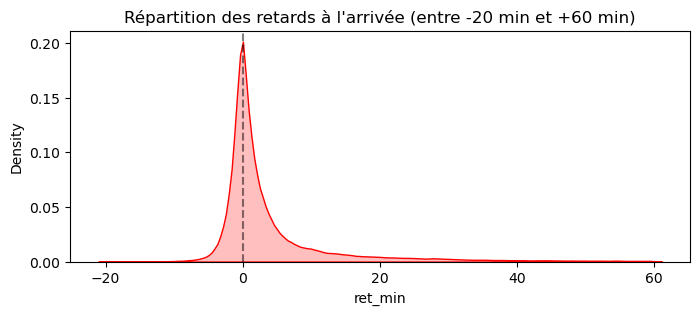

In [231]:
# répartition des retards
plt.figure(figsize=(8,3))
sns.kdeplot(df_retards[(df_retards['ret_min'] >= -20) & (df_retards['ret_min'] <= 60)]['ret_min'], fill=True, bw_adjust=0.5, color='r')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title("Répartition des retards à l'arrivée (entre -20 min et +60 min)")

In [223]:
# Catégories de retard : 10- [-10,-5[ [-5,0[ [0,5[ [5,10[ [10,15[ [15,30[ [30,60[ 60+

bins = [float("-inf"), -10, -5, 0, 5, 10, 15, 30, 60, float("inf")]
labels = [
    "-10-",
    "[-10,-5[",
    "[-5,0[",
    "[0,5[",
    "[5,10[",
    "[10,15[",
    "[15,30[",
    "[30,60[",
    "[60+]"
]

df_retards["ret_cat"] = pd.cut(df_retards["ret_min"], bins=bins, labels=labels, right=False)

<Axes: xlabel='ret_cat', ylabel='Count'>

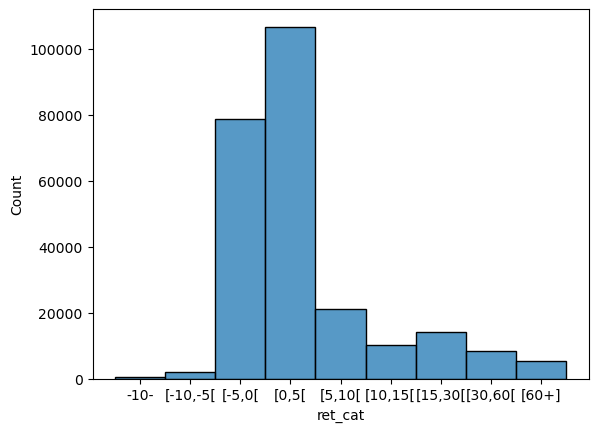

In [225]:
# histogramme des ret_cat
sns.histplot(data=df_retards, x="ret_cat")